#### 여름철 체감 온도 예측 머신러닝 모델

In [15]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

In [16]:
# csv 파일 읽어오기
data = pd.read_csv('/Users/hyunjulee/project/SensibleTemp/data/csv/summer.csv')
data.head()

,Date,Temperature,Humidity,SensibleTemp
0,2000-05-01,19.2,55.9,20.0
1,2000-05-02,19.8,40.3,19.4
2,2000-05-03,21.9,38.3,21.2
3,2000-05-04,23.9,31.9,22.4
4,2000-05-05,21.9,39.2,21.2


In [17]:
# 일자는 학습에 필요없으니까 drop
df = data.drop('Date', axis=1)
df.head()

,Temperature,Humidity,SensibleTemp
0,19.2,55.9,20.0
1,19.8,40.3,19.4
2,21.9,38.3,21.2
3,23.9,31.9,22.4
4,21.9,39.2,21.2


In [18]:
# 최저 체감 온도, 최고 체감 온도
print('여름철 최고 체감 온도 : ', df['SensibleTemp'].max())
print('여름철 최저 체감 온도 : ', df['SensibleTemp'].min())

여름철 최고 체감 온도 :  37.4
여름철 최저 체감 온도 :  14.9


In [19]:
# target / features 분리
target = 'SensibleTemp'
features = df.drop(target, axis=1).columns

# X / y 분리
X = df[features]
y = df[target]

# train / val / test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# 확인
print('train set:', X_train.shape, y_train.shape)
print('val set:', X_val.shape, y_val.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (2084, 2) (2084,)
val set: (521, 2) (521,)
test set: (652, 2) (652,)


In [20]:
# 다중 선형 회귀 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 다중 선형 회귀 r2, mae
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
model_r2 = r2_score(y_val, pred_val)
model_mae = mean_absolute_error(y_val, pred_val)

# 다중 선형 회귀 r2, mae
print('train r2 score : ', r2_score(y_train,pred_train))
print('train MAE score : ', mean_absolute_error(y_train,pred_train))
print('')
print('val r2 score : ', model_r2)
print('val MAE score : ', model_mae)

train r2 score :  0.9963184693224669
train MAE score :  0.16861040689433635

val r2 score :  0.9965809014223485
val MAE score :  0.1634580155431806


In [21]:
# 일반화성능 확인
pred_test = model.predict(X_test)

print('test r2 score : ', r2_score(y_test, pred_test))
print('test mae score : ', mean_absolute_error(y_test, pred_test))

test r2 score :  0.9954302157491461
test mae score :  0.18710174024003973


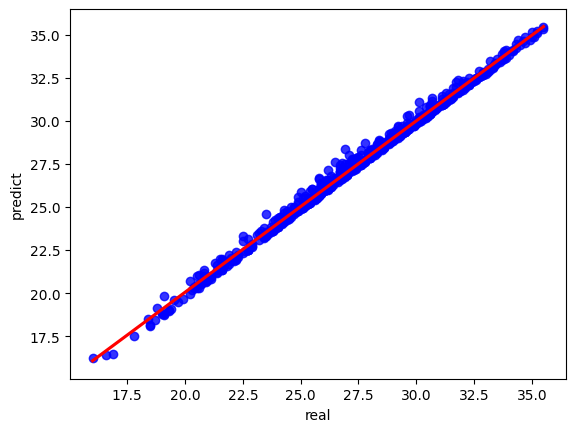

In [22]:
# 시각화
result  = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred_test)], axis = 1)
result.columns = ['real', 'predict']
sns.regplot(x = 'real', y = 'predict', data = result,
            line_kws={"color": "red"}, scatter_kws={"color": "blue"});

In [23]:
# 모델 피클링
joblib.dump(model, '/Users/hyunjulee/project/SensibleTemp/data/pkl/s_multiple_ols.pkl')

['/Users/hyunjulee/project/SensibleTemp/data/pkl/s_multiple_ols.pkl']

In [24]:
# 잘 불러와 지는지 확인
load_model = joblib.load('/Users/hyunjulee/project/SensibleTemp/data/pkl/s_multiple_ols.pkl')
load_model

LinearRegression()